In [4]:
import pickle
import numpy as np
import pandas as pd

# paths
data_root = '../../data/'
doc_vectors_path = data_root + 'doc-vectors.pickle'
labels_path = data_root + 'train-labels.csv'

# reading labels
labels_df = pd.read_csv(labels_path)
labels_df = labels_df[['Label']]

labeled_count = len(labels_df.index)

doc_vectors = pickle.load(open(doc_vectors_path, 'rb'))
vectors_df = pd.DataFrame.sparse.from_spmatrix(doc_vectors)[:labeled_count]
vectors_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,60977,60978,60979,60980,60981,60982,60983,60984,60985,60986,60987,60988,60989,60990,60991,60992,60993,60994,60995,60996,60997,60998,60999,61000,61001,61002,61003,61004,61005,61006,61007,61008,61009,61010,61011,61012,61013,61014,61015,61016,61017,61018,61019,61020,61021,61022,61023,61024,61025,61026,61027,61028,61029,61030,61031,61032,61033,61034,61035,61036
0,0.013130,0.020366,0.072828,0.040598,0.099997,0.035254,0.105695,0.183980,0.188137,0.189056,0.057123,0.091726,0.093306,0.031294,0.223769,0.100452,0.06896,0.160457,0.062886,0.112635,0.082756,0.073658,0.034913,0.154316,0.067811,0.221687,0.065263,0.201668,0.175195,0.189056,0.110991,0.152157,0.161945,0.084135,0.064303,0.142597,0.089421,0.037365,0.168408,0.06588,0.061658,0.076272,0.033155,0.139069,0.042975,0.131801,0.061147,0.055438,0.022587,0.032649,0.056173,0.046002,0.053421,0.07473,0.024508,0.214259,0.164281,0.193342,0.203307,0.170062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002117,0.000000,0.000000,0.000000,0.000000,0.011369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029104,0.000000,0.008460,0.000000,0.027202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081398,0.000000,0.000000,0.000000,0.036150,0.000000,0.00000,0.019884,0.000000,0.010692,0.000000,0.013859,0.000000,0.000000,0.000000,0.014568,0.021058,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.011706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.038114,0.000000,0.063850,0.000000,0.000000,0.031864,0.012982,0.000000,0.000000,0.000000,0.030705,0.00000,0.028173,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056520,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034961,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045885,0.000000,0.000000,0.000000,0.00000,0.044263,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.005571,0.000000,0.000000,0.034453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

c:\users\kian\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\kian\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\kian\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\users\kian\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

56.25422191619873


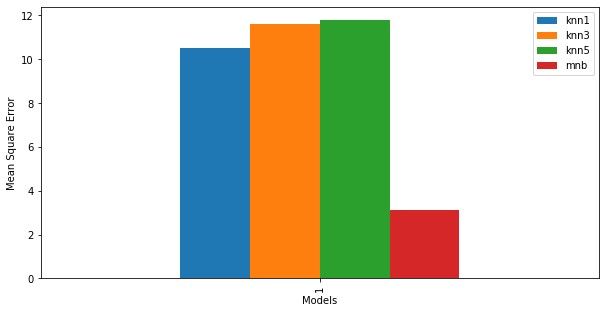

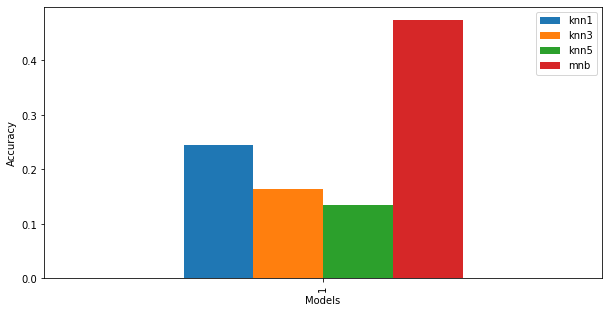

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(vectors_df, labels_df, random_state=6, test_size=.2)

acc = {}
mse = {}

# k nearest neighbors for k = {1, 3, 5}
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    predictions = knn.predict(x_test)
    acc[f'knn{k}'] = accuracy_score(y_test, predictions)
    mse[f'knn{k}'] = mean_squared_error(y_test, predictions)
# multinomial naive bayes classifier
mnb = MultinomialNB().fit(x_train, y_train)
predictions = mnb.predict(x_test)
acc['mnb'] = accuracy_score(y_test, predictions)
mse['mnb'] = mean_squared_error(y_test, predictions)

# MSE comparison of models
ax = pd.DataFrame(mse, index=(1,)).plot(kind='bar', figsize=(10, 5))
ax.set_ylabel('Mean Square Error')
ax.set_xlabel('Models')
plt.show()
# ACC comparison of models
ay = pd.DataFrame(acc, index=(1,)).plot(kind='bar', figsize=(10, 5))
ay.set_ylabel('Accuracy')
ay.set_xlabel('Models')
plt.show()

(array([ 39.,  91.,  90.,  62.,   0., 319., 159., 128., 111.,   1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

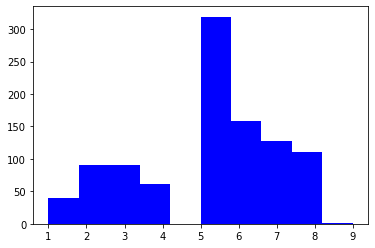

In [24]:
plt.hist(labels_df.Label, color='blue')
# unfortunately biased

In [ ]:
# classifying the rest
vectors_df = pd.DataFrame.sparse.from_spmatrix(doc_vectors)[labeled_count:]
predictions = mnb.predict(vectors_df)
# concatenate existing hand labeleds and predictions
labels_df = labels_df.append(pd.DataFrame(data=predictions, columns=['Label']))

# saving to dataset
refined_dataset_path = '../../data/refined_dataset.csv/'
sheet = pd.read_csv(refined_dataset_path)
sheet['category'] = labels_df['Label']
sheet.to_csv(refined_dataset_path, index=False)